# Preprocesamiento

In [26]:
'''!pip install fitz
!pip uninstall pymupdf
!pip install pymupdf
!pip install wordcloud'''

'!pip install fitz\n!pip uninstall pymupdf\n!pip install pymupdf\n!pip install wordcloud'

In [27]:
import fitz

def extract_text_from_pdf(file_path):
    text = ""
    with fitz.open(file_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

pdf_path = "goog-10-q-q1-2024.pdf"
extracted_text = extract_text_from_pdf(pdf_path)


In [28]:
extracted_text

'UNITED STATES\nSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n________________________________________________________________________________________\nFORM 10-Q \n________________________________________________________________________________________\n(Mark One)\n☒\nQUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the quarterly period ended March 31, 2024\nOR\n☐\nTRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the transition period from _______ to _______\nCommission file number: 001-37580 \n________________________________________________________________________________________\nAlphabet Inc. \n(Exact name of registrant as specified in its charter)\n________________________________________________________________________________________\nDelaware\n61-1767919\n(State or other jurisdiction of incorporation or organization)\n(I.R.S. Employer Identification Number)\n1600 Amphitheatre 

In [29]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(text):

    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r"\[(.*?)\]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\w+…|…", "", text)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)

    text = text.lower()

    filtered_words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_words)

processed_text = preprocess_text(extracted_text)


In [30]:
processed_text

'united states securities exchange commission washington d c 20549 ________________________________________________________________________________________ form 10 q ________________________________________________________________________________________ mark quarterly report pursuant section 13 15 d securities exchange act 1934 quarterly period ended march 31 2024 transition report pursuant section 13 15 d securities exchange act 1934 transition period _______ _______ commission file number 001 37580 ________________________________________________________________________________________ alphabet exact registrant specified charter ________________________________________________________________________________________ delaware 61 1767919 state jurisdiction incorporation organization r s employer identification number 1600 amphitheatre parkway mountain view ca 94043 address principal executive offices including zip code 650 253 0000 registrant s telephone number including area code sec

In [31]:
print('Extensión del texto original:', len(extracted_text),'\nExtensión del texto procesado:', len(processed_text))

Extensión del texto original: 136126 
Extensión del texto procesado: 101150


# EDA

In [32]:
!pip install wordcloud

In [33]:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

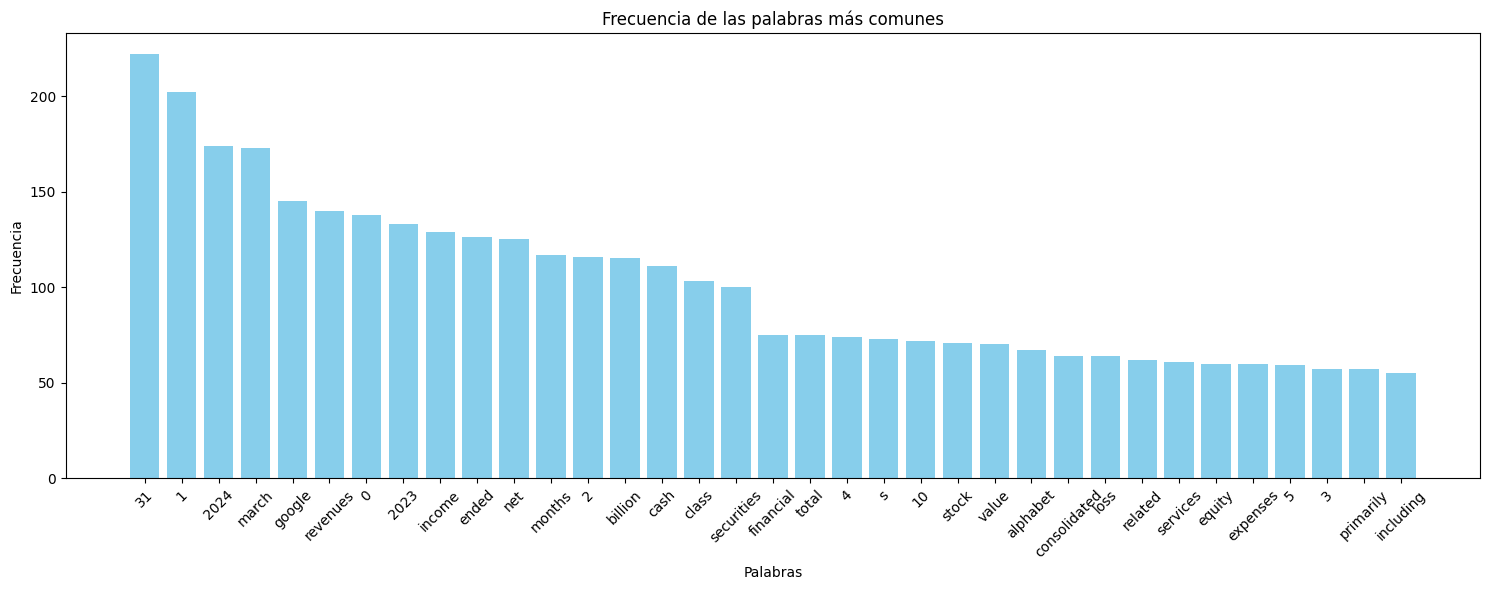

In [34]:

# Análisis de frecuencia
word_counts = Counter(processed_text.split())
most_common = word_counts.most_common(35)
words, counts = zip(*most_common)

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las palabras más comunes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

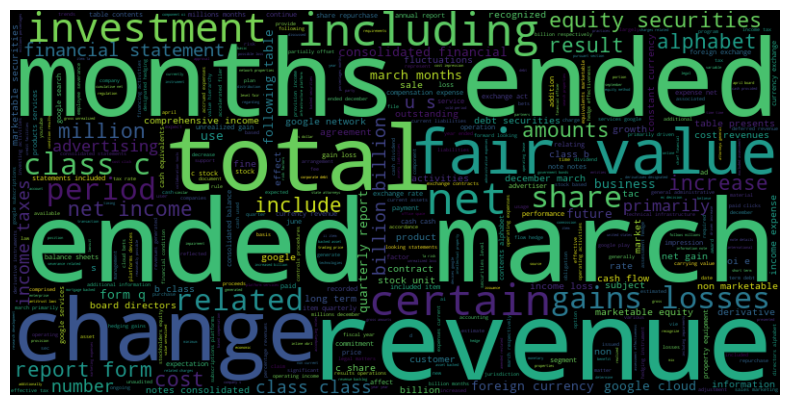

In [35]:
# Word cloud
wordcloud = WordCloud(width=800, height=400, max_words=1000).generate(processed_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [37]:
!pip install gensim

In [40]:
!pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/3e/50/0bdc9ec73b669dd53bdc1c61ebcb35febad5ba009f1ced93e924d756478c/regex-2024.4.28-cp310-cp310-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.5 MB/s eta 0:00:00
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 7.7 MB/s eta 0:00:00


In [39]:
from gensim.models import KeyedVectors

model_path = 'GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

tokens = word_tokenize(processed_text)
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stopwords.words('english')]

[nltk_data] Downloading package punkt to /Users/johan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/johan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/johan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
vectors = [word2vec[word] for word in tokens if word in word2vec]

In [51]:
len(vectors)

11837

In [49]:
vectors[0].shape

(300,)

/Users/johan/opt/anaconda3/envs/lwmmm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johan/opt/anaconda3/envs/lwmmm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johan/opt/anaconda3/envs/lwmmm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/johan/opt/anaconda3/envs/lwmmm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

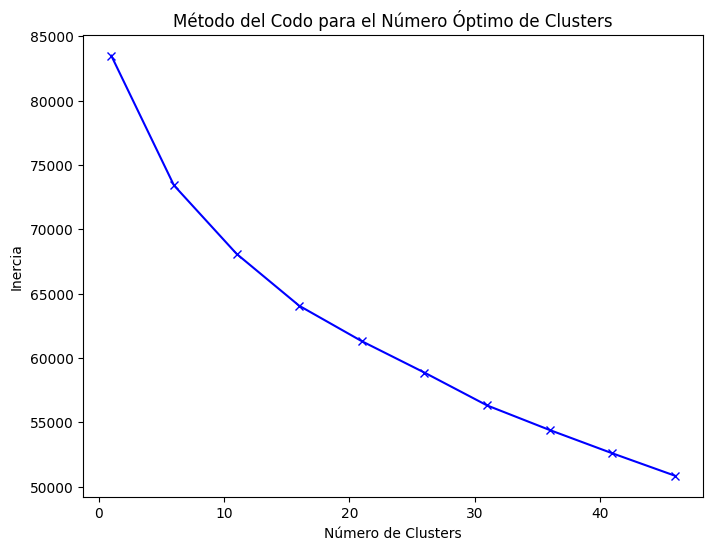

In [54]:
from sklearn.cluster import KMeans

# Definir el rango de números de clusters a evaluar
range_clusters = range(1, 50,5)

# Guardar las inercias para cada número de clusters
inercias = []

# Evaluar K-means para cada número de clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(vectors)
    inercias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inercias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para el Número Óptimo de Clusters')
plt.show()

In [59]:
num_clusters = 50

# Aplicar KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(vectors)

# Obtener los centroides
centroids = kmeans.cluster_centers_

/Users/johan/opt/anaconda3/envs/lwmmm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
for i, centroid in enumerate(centroids):
    similar_words = word2vec.similar_by_vector(centroid, topn=5)
    print(f"Cluster {i + 1}: {[word for word, _ in similar_words]}")

Cluster 1: ['obligation', 'obligation_toupdate', 'noobligation', 'obligationto_update', 'update']
Cluster 2: ['Marchex_www.marchex.com', 'Search_chicagotribune.com', 'Go_Daddy_SSL_Certificates', 'Info_GCLL_###-####', 'NetInformer_leading']
Cluster 3: ['equity', 'stock', 'repurchase', 'cash', 'repurchases']
Cluster 4: ['BY_ANDY_THOMPSON', 'By_DAVID_SCHEPP', 'By_Jonas_Elmerraji', '%_#F########_3v.jsn', 'By_Laurelle_Gilbert']
Cluster 5: ['f_Represents', 'b_Reflects', 'g_Represents', 'b_Excludes', 'c_Relates']
Cluster 6: ['currency', 'financial', 'debt', 'investment', 'nondollar']
Cluster 7: ['4', '2', '5', '3', '1']
Cluster 8: ['net', 'consolidated', 'operating_income1', 'netincome', 'ended_September##']
Cluster 9: ['revenue', 'revenues', 'income', 'profits', 'profit']
Cluster 10: ['0', 'bd_div_story', 'var_bd_=_getElementsByClass', 'BORDER_=', 'By_Chuck_Ristano']
Cluster 11: ['report', 'statement', 'document', 'reports', 'statment']
Cluster 12: ['march', 'marching', 'marches', 'marched',

In [58]:
for i, centroid in enumerate(centroids):
    similar_words = word2vec.similar_by_vector(centroid, topn=5)
    print(f"Cluster {i + 1}: {[word for word, _ in similar_words]}")

Cluster 1: ['By_Jonas_Elmerraji', 'By_DAVID_SCHEPP', 'By_Laurelle_Gilbert', 'BY_ANDY_THOMPSON', 'By_Miriam_Reimer']
Cluster 2: ['operating_income1', '##.##mln_rub', '#.##_perdiluted', 'ended_September##', 'TEB_adjustment']
Cluster 3: ['income', 'revenue', 'equity', 'investment', 'cash_flow']
Cluster 4: ['march', 'marching', 'marches', 'marched', 'marchers']
Cluster 5: ['2', '4', '1', '3', '5']


In [60]:
for i, centroid in enumerate(centroids):
    similar_words = word2vec.similar_by_vector(centroid, topn=5)
    print(f"Cluster {i + 1}: {[word for word, _ in similar_words]}")

Cluster 1: ['level', 'rate', 'table', 'rates', 'levels']
Cluster 2: ['value', 'intrinsic_value', 'price', 'risk', 'valuation']
Cluster 3: ['related', 'relating', 'relatedto', 'concerning', 'result']
Cluster 4: ['4', '2', '5', '3', '1']
Cluster 5: ['business', 'PETER_PASSI_covers', 'investment', 'C4ISR_integration', 'servicesand']
Cluster 6: ['google', 'google.com', 'google_yahoo', 'wikipedia', 'youtube']
Cluster 7: ['march', 'marching', 'marches', 'marched', 'marchers']
Cluster 8: ['legal', 'litigation', 'lawsuit', 'liability', 'declaratory_judgments']
Cluster 9: ['billion', 'million', 'billon', '#.#bn', '#.#billion']
Cluster 10: ['total', 'decrease', 'increase', 'increased', 'average']
Cluster 11: ['revenue', 'revenues', 'profits', 'Revenues', 'Revenue']
Cluster 12: ['stock', 'shares', 'dividend', 'dividend_payout', 'shareholders']
Cluster 13: ['alphabet', 'alphabets', 'alphabetic', 'syllabary_Sequoyah_developed', 'Hebrew_alphabet']
Cluster 14: ['primarily', 'principally', 'mainly', '

# Conclusiones

El análisis exploratorio de datos (EDA) realizado en el informe financiero no solo proporciona una comprensión visual inmediata a través de gráficos de barras y nubes de palabras, sino que también permite una exploración más profunda mediante el uso de técnicas avanzadas de procesamiento de lenguaje natural y aprendizaje automático. Al aplicar el modelo Word2Vec, que es altamente efectivo para capturar las relaciones semánticas entre palabras, podemos descomponer el texto en vectores que encapsulan su significado. Esto, a su vez, facilita el uso de métodos de clustering como K-means para identificar y agrupar conceptos y términos similares que emergen frecuentemente en el texto.

Este tipo de EDA avanzado es crucial para entender los temas predominantes y las preocupaciones subyacentes en documentos financieros, lo que puede ser invaluable para análisis financieros, auditorías, y estrategias de mejora comunicativa en informes corporativos. Por ejemplo, los clusters identificados pueden revelar enfoques en áreas como obligaciones financieras, resultados de ingresos, estrategias de inversión, y movimientos del mercado, proporcionando así una base sólida para la toma de decisiones estratégicas informadas.

Además, este enfoque puede adaptarse y aplicarse a una variedad de documentos textuales en diferentes campos, no solo en finanzas, lo que lo hace una herramienta versátil en la era de los datos. El poder combinar visualización de datos, modelado de temas y técnicas de clustering abre nuevas posibilidades para extraer insights que pueden ser sutiles o difíciles de detectar a través de métodos tradicionales de revisión de textos. Esto subraya la importancia de las técnicas de EDA en la comprensión profunda de grandes volúmenes de texto, ayudando a las organizaciones a manejar mejor la información y utilizarla de manera estratégica para mejorar sus operaciones y estrategias de comunicación.